# CNN on Handwritten Digits with Keras

In [1]:
import tensorflow as tf
print(tf.__version__)
!python --version

2.5.0
Python 3.7.11


In [4]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.datasets import mnist
%matplotlib inline

## Importing the data:

In [5]:
(X_train_, y_train_), (X_test_, y_test_) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train_.shape

(60000, 28, 28)

In [7]:
y_train_.shape

(60000,)

In [8]:
# Reshape the training data to represent one-channel image input(grayscale)
img_rows, img_cols = X_train_[0].shape[0], X_train_[0].shape[1]
X_train = X_train_.reshape(X_train_.shape[0], img_rows, img_cols, 1)
X_test = X_test_.reshape(X_test_.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_test.shape

(10000, 28, 28, 1)

In [11]:
#Normalize the input data:
X_train_std = X_train.astype('float32')/255.
X_test_std = X_test.astype('float32')/255.

In [12]:
#One-hot encode the labels:
n_classes = len(set(y_train_))
y_train = to_categorical(y_train_, n_classes)
y_test = to_categorical(y_test_, n_classes)

## CNN architecture:

In [13]:
help(Conv2D)

Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`. You can use `None` when
 |  a dimension has variable size.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28, 3)
 |  >>> x = tf.random

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

## Compiling the model:

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#hyperparameters
batch_size = 128
n_epochs = 20

## Train the model:

In [17]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs)

Epoch 1/20
469/469 [==============================] - 40s 17ms/step - loss: 0.6197 - accuracy: 0.9163
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1115 - accuracy: 0.9677
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0845 - accuracy: 0.9752
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0700 - accuracy: 0.9801
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0602 - accuracy: 0.9821
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0536 - accuracy: 0.9834
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0460 - accuracy: 0.9861
Epoch 9/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0432 - accuracy: 0.9871
Epoch 10/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0400 - accur

In [18]:
#Show the results on the test set:
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0359 - accuracy: 0.9919
Test loss: 0.035887476056814194
Test accuracy: 0.9919000267982483


## Showing predictions:

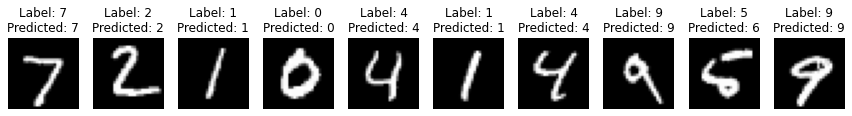

In [19]:
preds = model.predict(X_test)
n = 10
plt.figure(figsize=(15,15))
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
plt.show()          

## Plotting misclassified images:

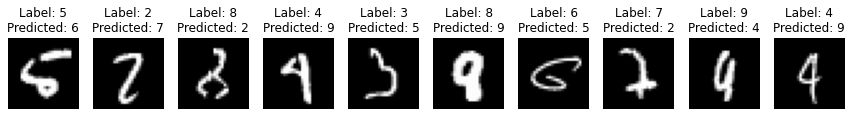

In [20]:
plt.figure(figsize=(15,15))
misc = 0
for i in range(len(y_test)):
    if(misc==10):
        break
    label = np.argmax(y_test[i])
    pred = np.argmax(preds[i])
    if label != pred:
        plt.subplot(1, n, misc + 1)
        plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Label: {}\nPredicted: {}".format(label, pred))
        plt.axis('off')
        misc+=1
plt.show()        

## Reference:

https://keras.io/datasets/